#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 11
### Due: Monday, Apr 18th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Apr 18th.

---

## Problem 1

This problem has to do with density estimation and clustering. 

In [1]:
#Packages
import requests
import io
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from astroML.density_estimation import KNeighborsDensity

1. Read in `hw11_data.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels.

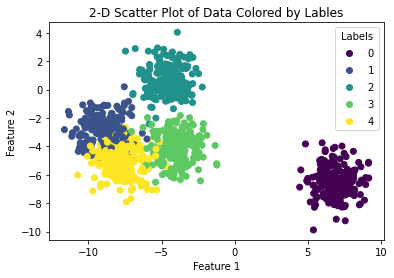

In [2]:
#Plot 2 features against eachother
data = np.load('hw11_data.npy')
scatter = plt.scatter(data[:,0],data[:,1], c=data[:,2])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2-D Scatter Plot of Data Colored by Lables")
plt.legend(*scatter.legend_elements(),title="Labels")

2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 

In [3]:
# Determine best bandwwith
from sklearn.neighbors import KernelDensity
grid = GridSearchCV(KernelDensity(),{'bandwidth': np.linspace(0.1, 1.0, 30)},cv=5) #5-fold cross-validation
grid.fit(data[:,0:1])
bw = grid.best_params_['bandwidth']
print("Best bandwidth: ", bw)

Best bandwidth:  0.28620689655172415


Text(0.5, 0.92, 'Kernel Density Estimate')

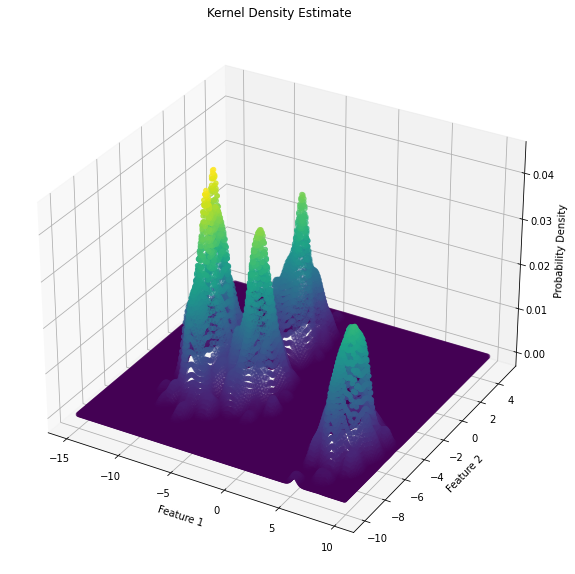

In [4]:
#Build model
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data[:,[0,1]])

#Build base for model to predict off of
x = np.arange(-15,10,.1)
y = np.arange(-10,5,.1)
xx, yy = np.meshgrid(x,y)
xx = np.ravel(xx)
yy = np.ravel(yy)
a = np.vstack((xx,yy))
a=np.transpose(a)

#Run model
z = kde.score_samples(a)
zz = np.power(math.e,z) #Undo log-likelihood 

#Plot
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
x, y = a.nonzero()
ax.scatter(xx, yy, zz, c=zz, cmap='viridis')
ax.set_zlabel("Probability Density")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Kernel Density Estimate")

3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?

Text(0.5, 0.92, 'Nearest Neighbor Density Estimate')

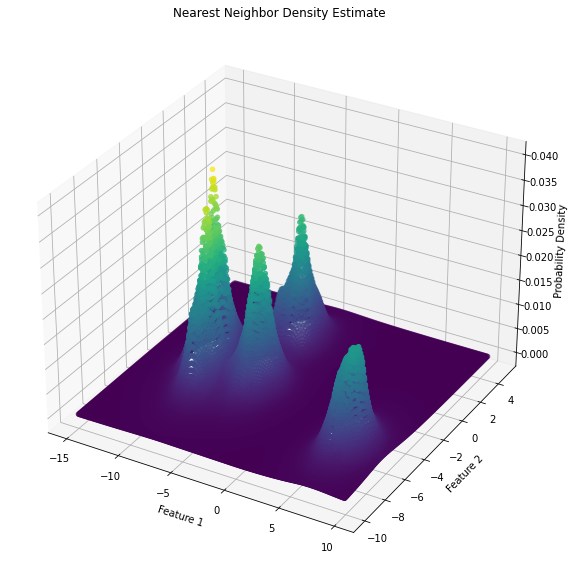

In [5]:
#Compute density with Bayesian nearest neighbors
nbrs = KNeighborsDensity('bayesian', n_neighbors=35)
nbrs.fit(data[:,[0,1]])
z = nbrs.eval(a)
zz = z / np.sqrt(np.sum(z**2)) #Normalize

#Plot
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
x, y = a.nonzero()
ax.scatter(xx, yy, zz, c=zz, cmap='viridis')
ax.set_zlabel("Probability Density")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Nearest Neighbor Density Estimate")

Around 35 neighbors in the Baysian nearest neighbors algorithim results in a graph with a similar shape.